In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./AB_NYC_2019.csv', sep=',')
pd.set_option('display.max_columns', None)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
list = ['id', 'name', 'host_id', 'host_name', 'last_review']
data = data.drop(list,axis = 1 )
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


Видем, что пустые данные есть только в столбце reviews_per_month

In [5]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
data[['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].nunique()

neighbourhood_group                 5
neighbourhood                     221
room_type                           3
minimum_nights                    109
number_of_reviews                 394
reviews_per_month                 937
calculated_host_listings_count     47
availability_365                  366
dtype: int64

Заполняем недостающие значения в колонке reviews_per_month. Запонить можно средним значением или использовать KNNImputer. Попробовал оба варианта, результат почти одинаков.

In [7]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())

In [8]:
#from sklearn.impute import KNNImputer
#knn_imputer = KNNImputer(n_neighbors=2)
#data[['reviews_per_month']] = knn_imputer.fit_transform(data[['reviews_per_month']])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [10]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Для построения матрици корреляции закодируем котегориальные признаки способом OrdinalEncoder

In [11]:
from sklearn.preprocessing import OrdinalEncoder 
data_enc = data.copy()
enc = OrdinalEncoder()
data_enc[['neighbourhood','neighbourhood_group','room_type']]= enc.fit_transform(data_enc[['neighbourhood','neighbourhood_group','room_type']])
data_enc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1.0,108.0,40.64749,-73.97237,1.0,149,1,9,0.210000,6,365
1,2.0,127.0,40.75362,-73.98377,0.0,225,1,45,0.380000,2,355
2,2.0,94.0,40.80902,-73.94190,1.0,150,3,0,1.373221,1,365
3,1.0,41.0,40.68514,-73.95976,0.0,89,1,270,4.640000,1,194
4,2.0,61.0,40.79851,-73.94399,0.0,80,10,9,0.100000,1,0


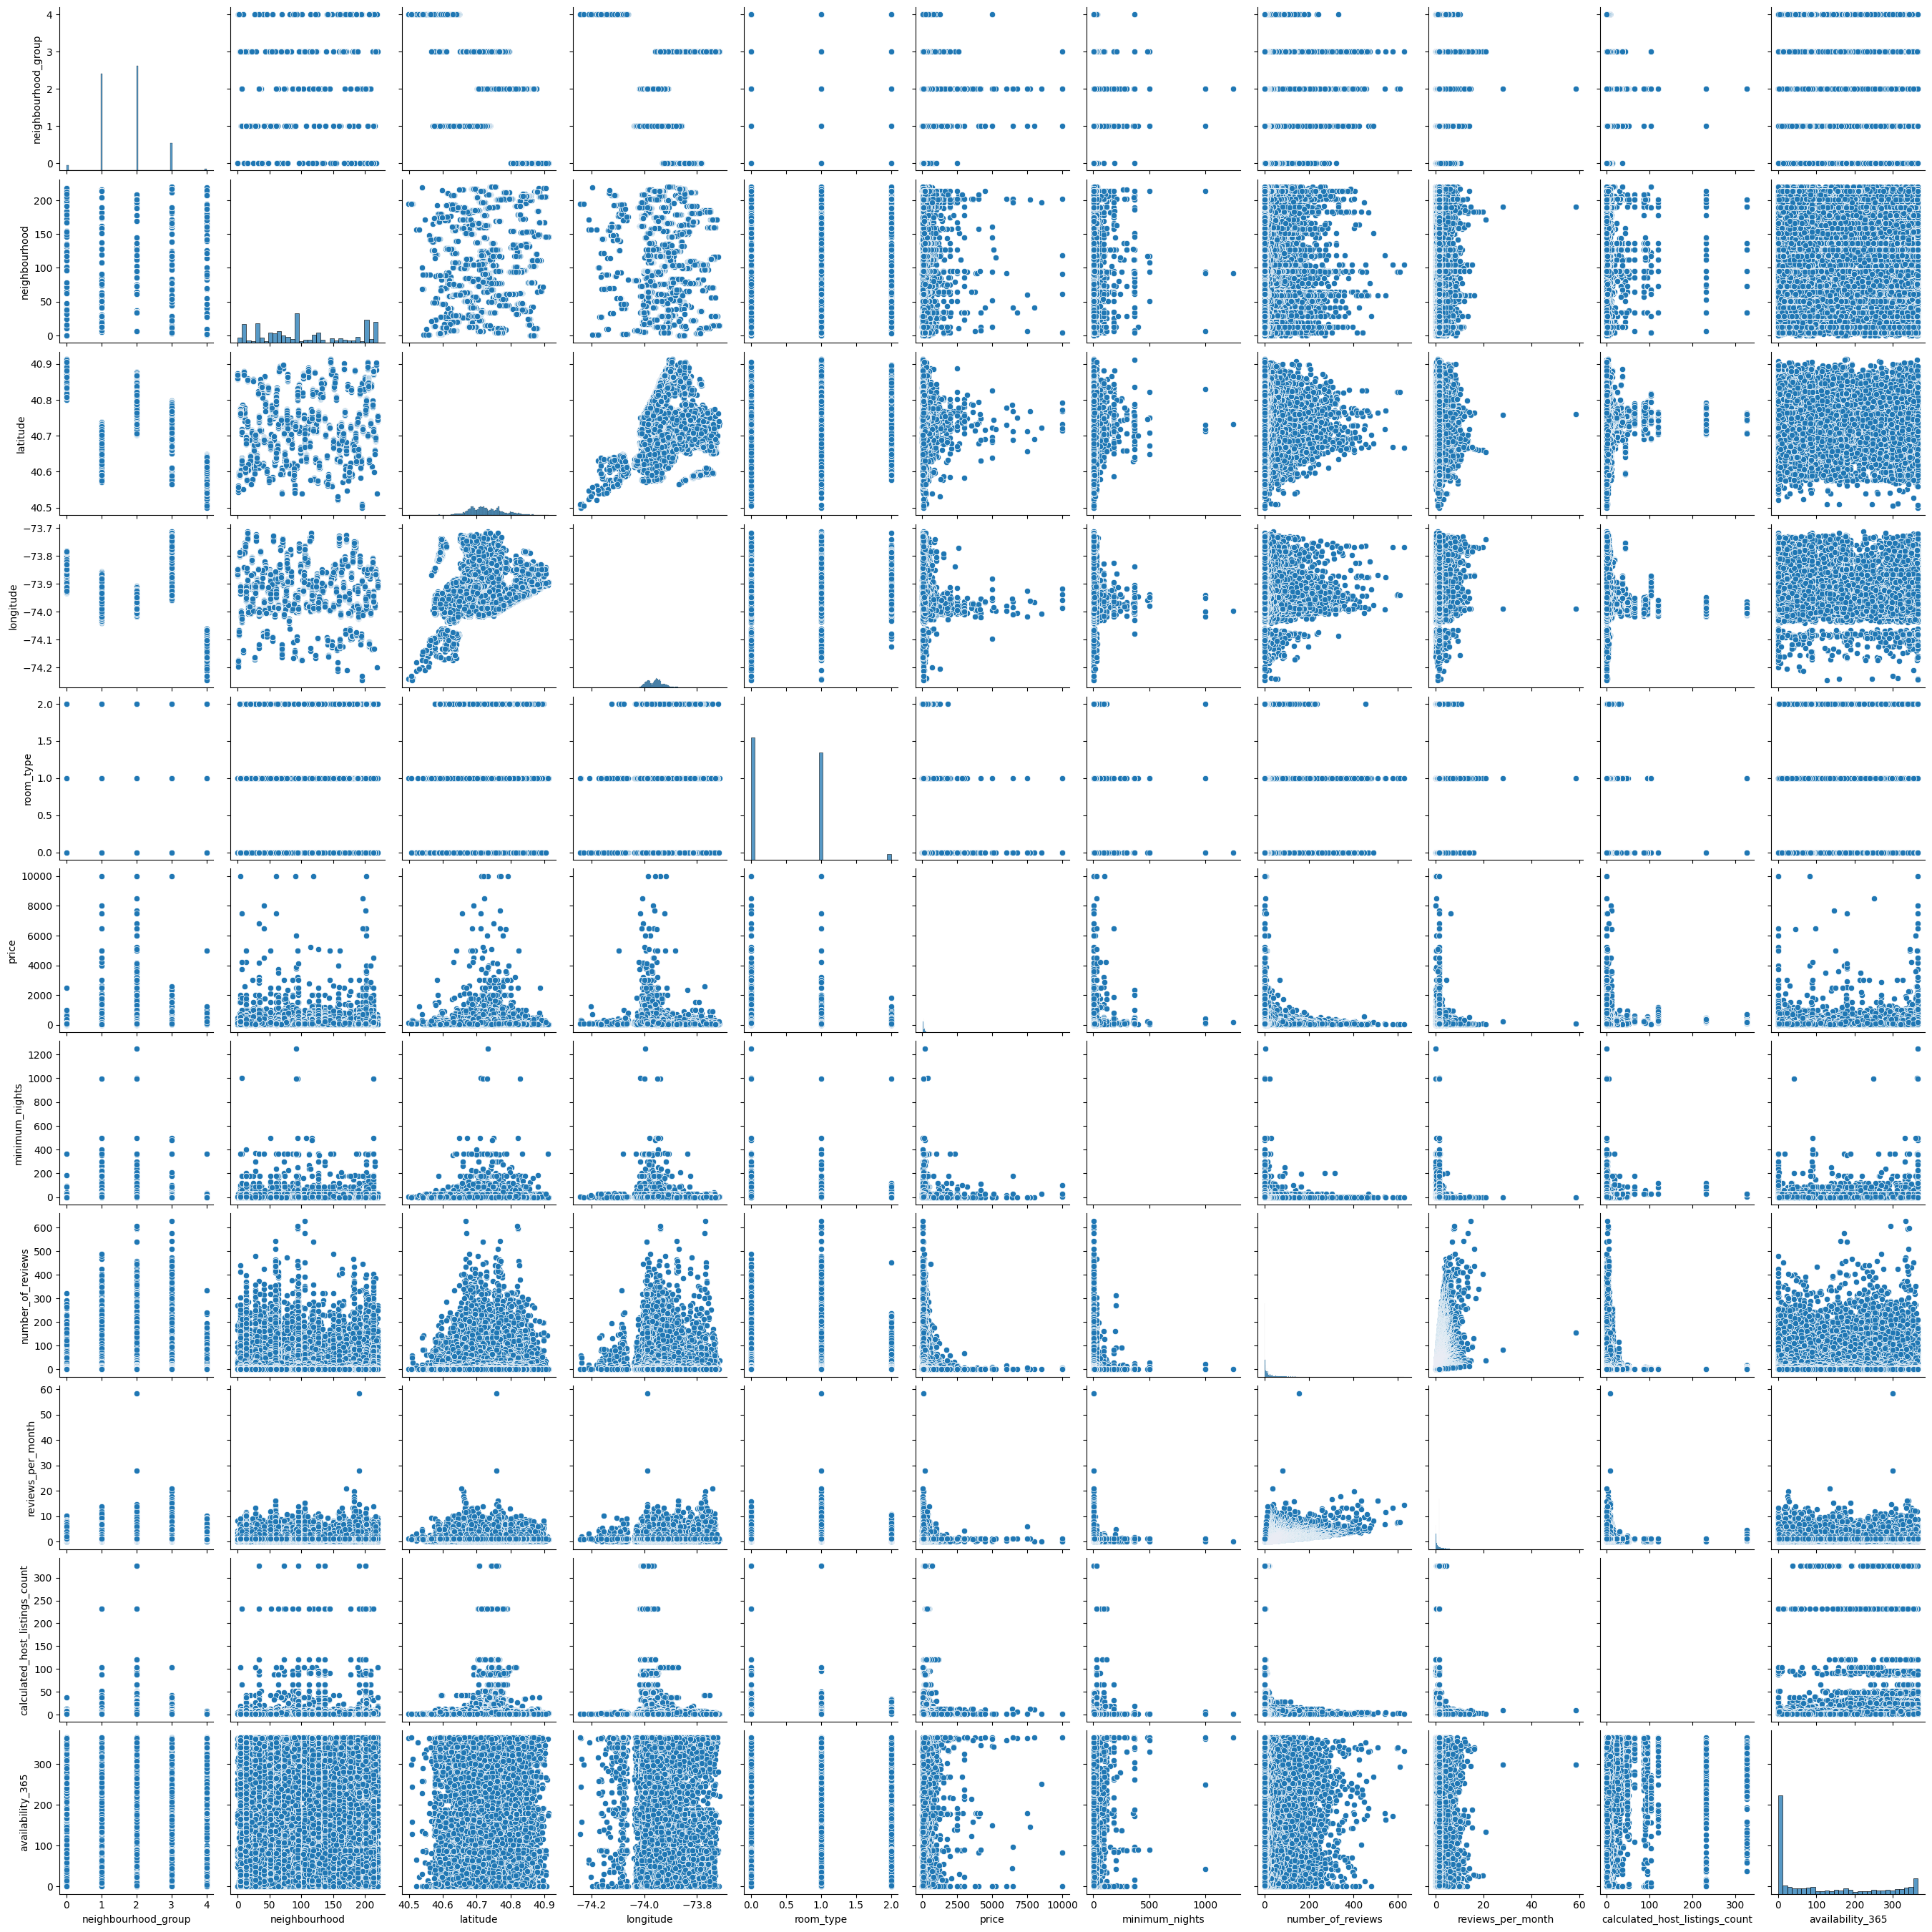

In [12]:
sns.pairplot (data_enc)

<Axes: >

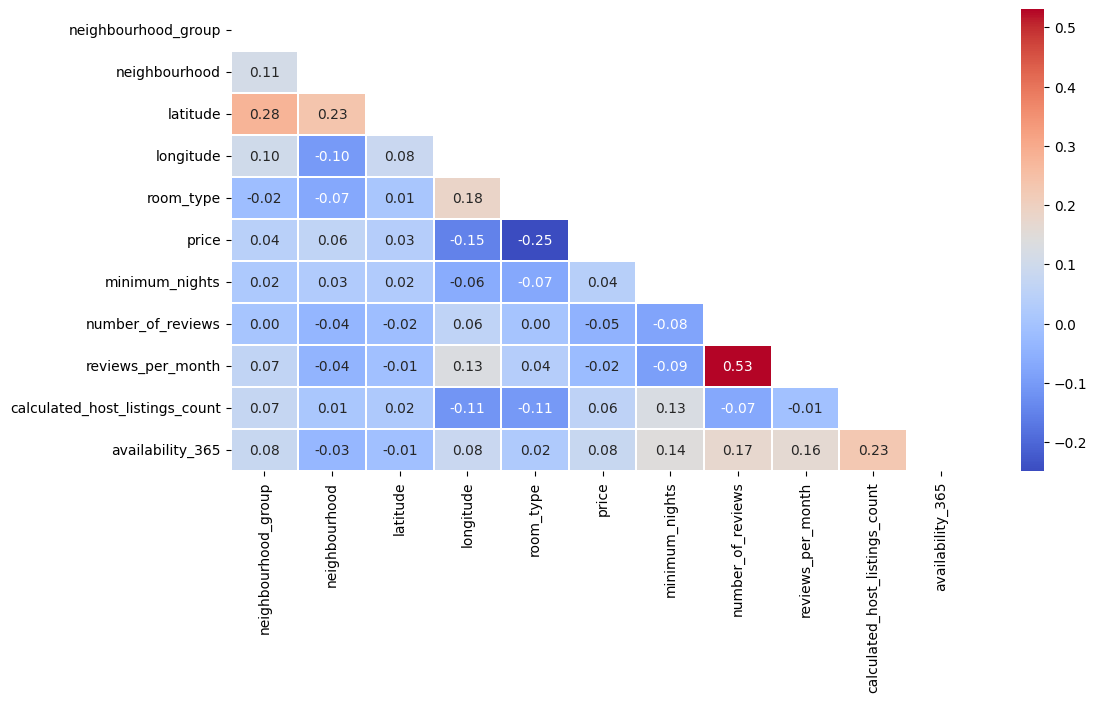

In [13]:
corr_data = data_enc.corr()
f,ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr_data,linewidths=0.1, annot=True, fmt =".2f", cmap ='coolwarm', mask=np.triu(np.ones_like(corr_data, dtype=bool)))

Вывод: Учитывая данный датасет, а также полученные графики и матрицу корреляции, можно сделать вывод что корреляция в данных отсутствует

Находим аномалии в данных. 
Построим графики зависимости цены от различных парамметров.

In [14]:
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [15]:
sns.set_style('whitegrid')
edgecolor = 'black'

def scatter_plot(data,a):
    plt.figure(figsize=(20, 5))
    plt.scatter(x=data[a], y=data['price'], edgecolor=edgecolor)
    plt.ylabel('Price', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of " + a + " and Price", fontsize=14)
    plt.show()

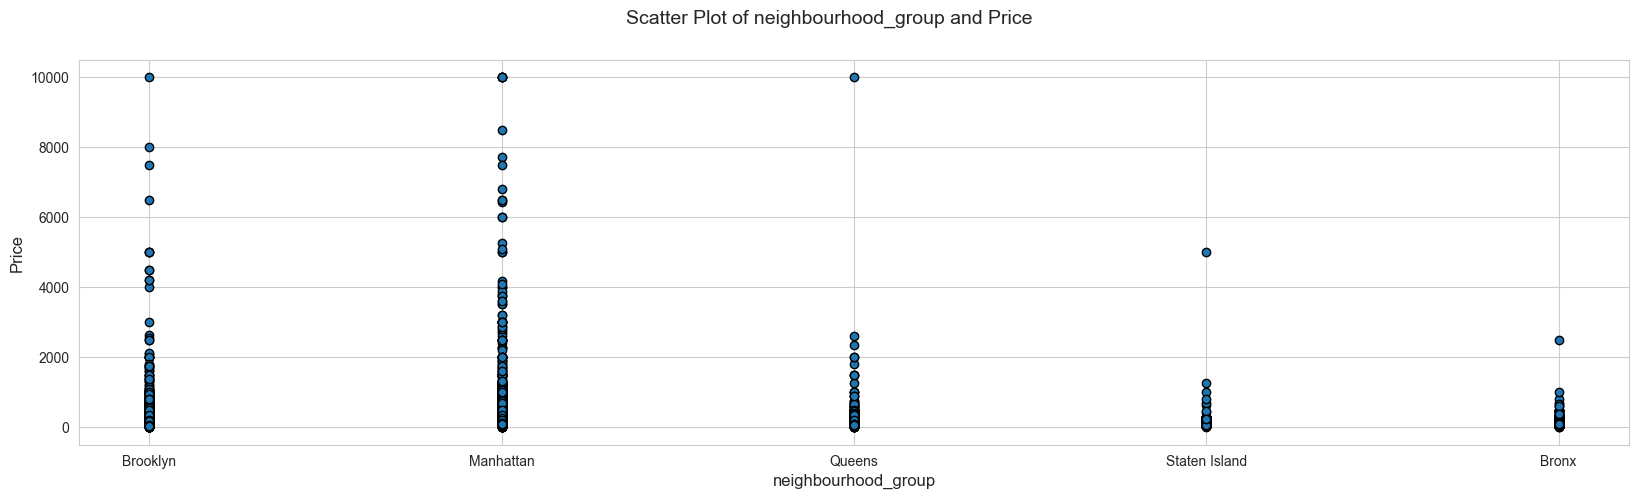

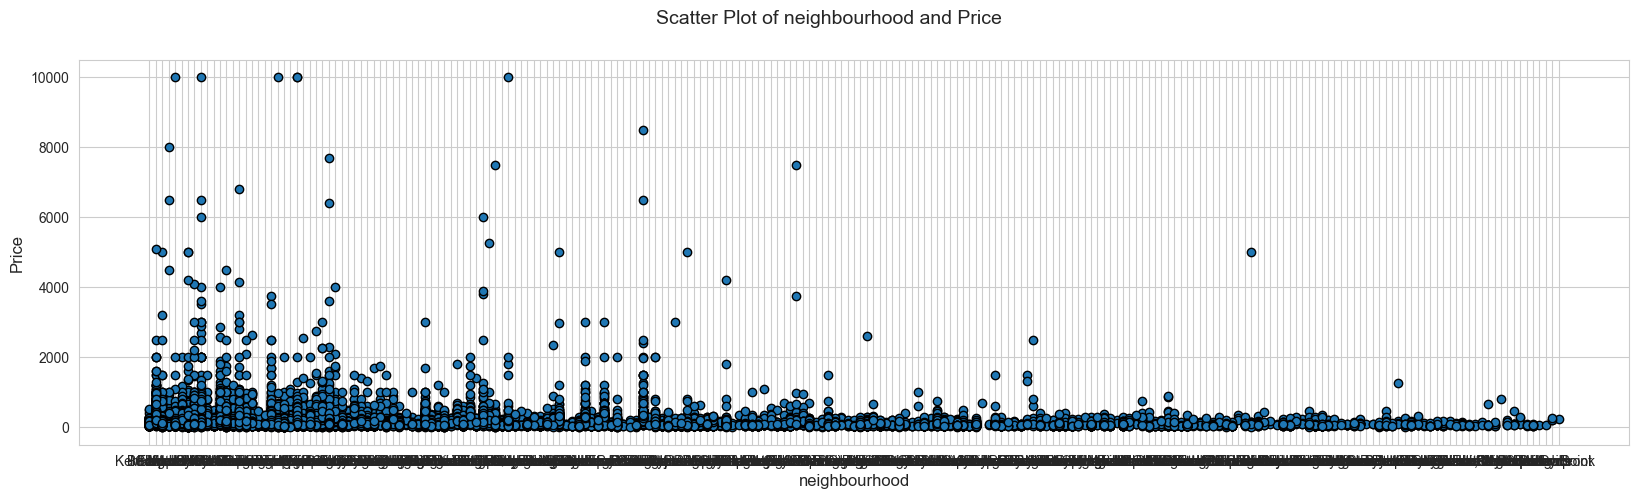

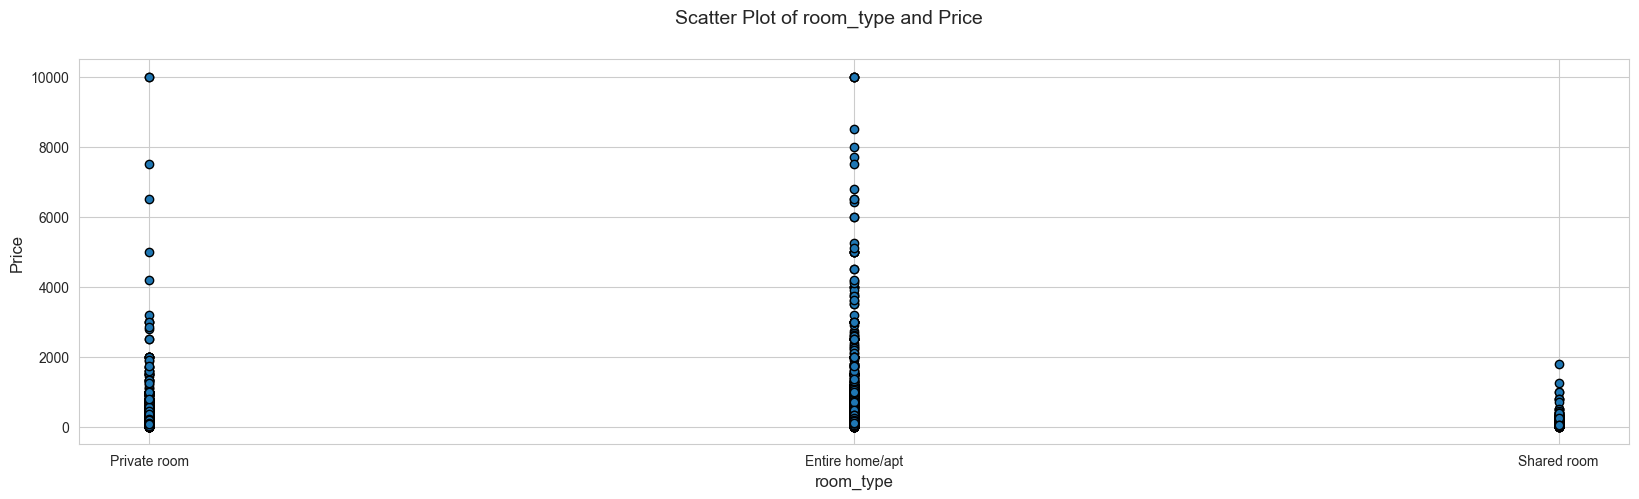

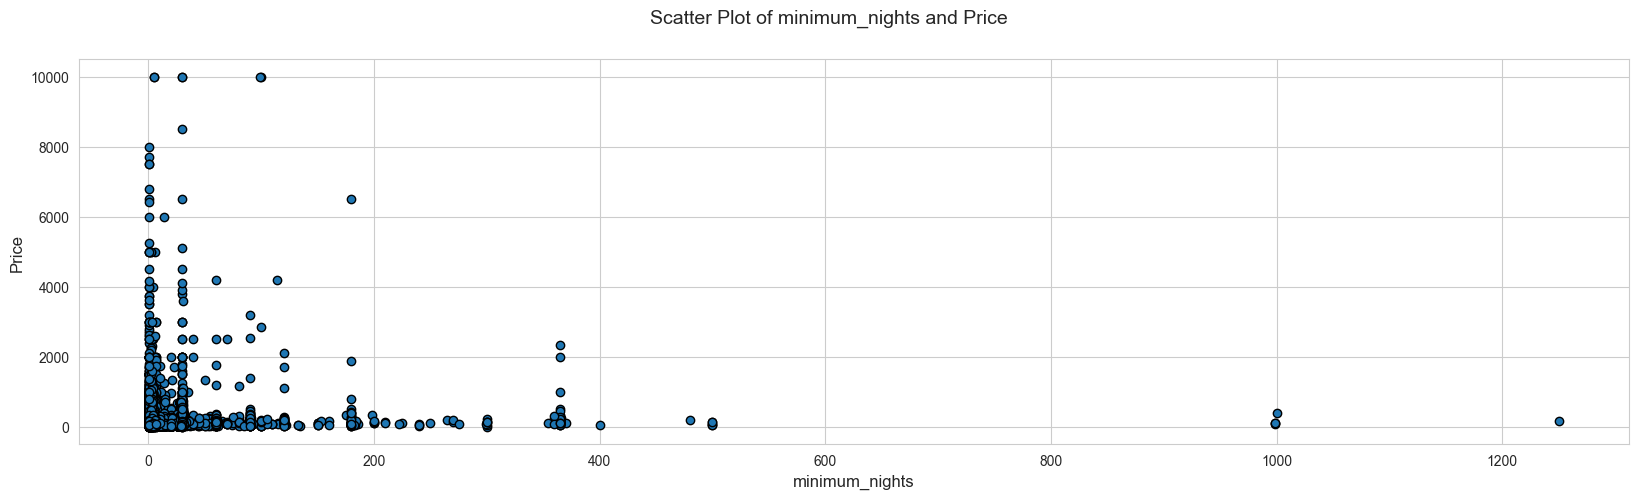

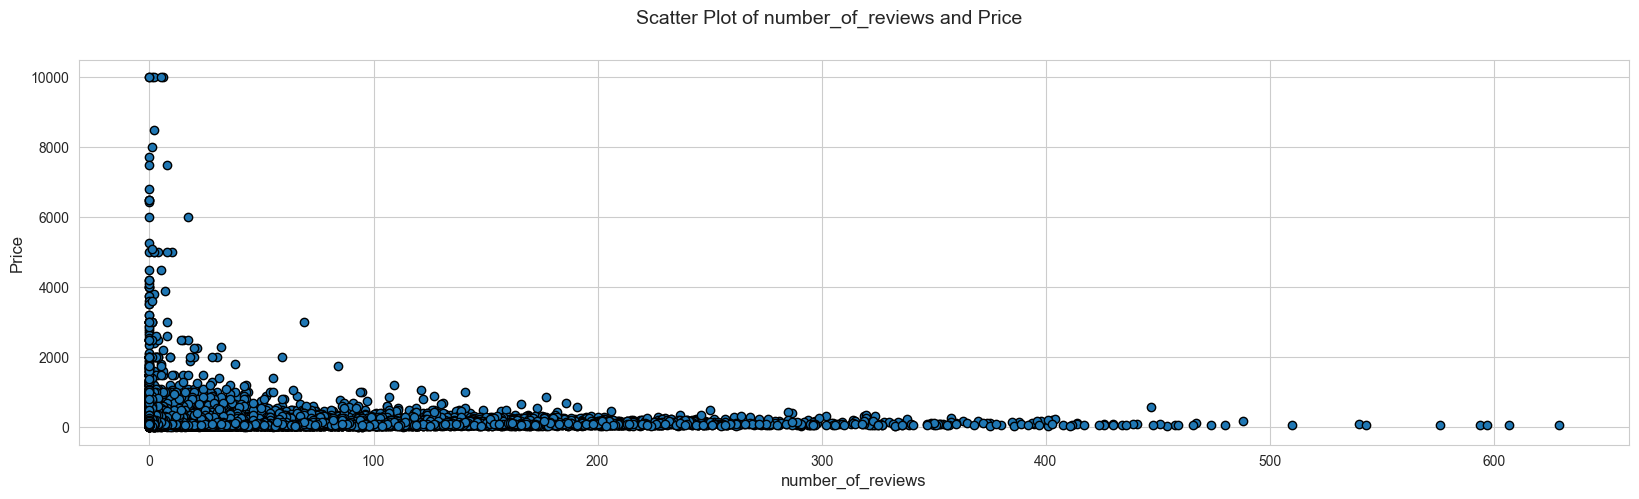

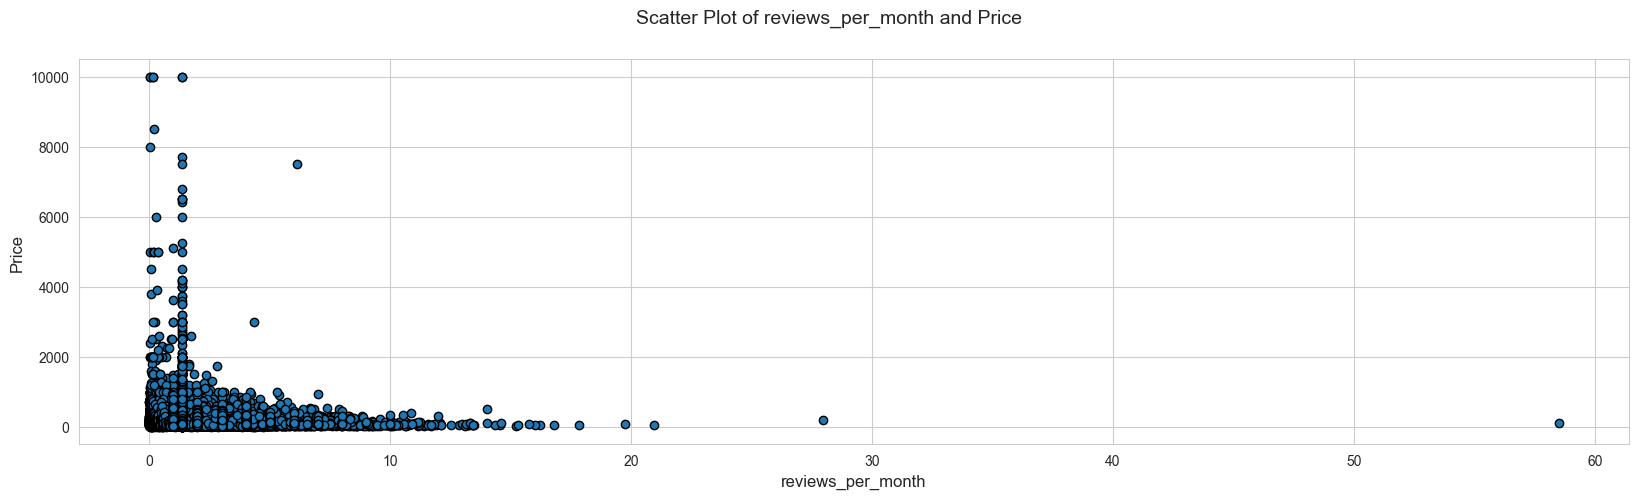

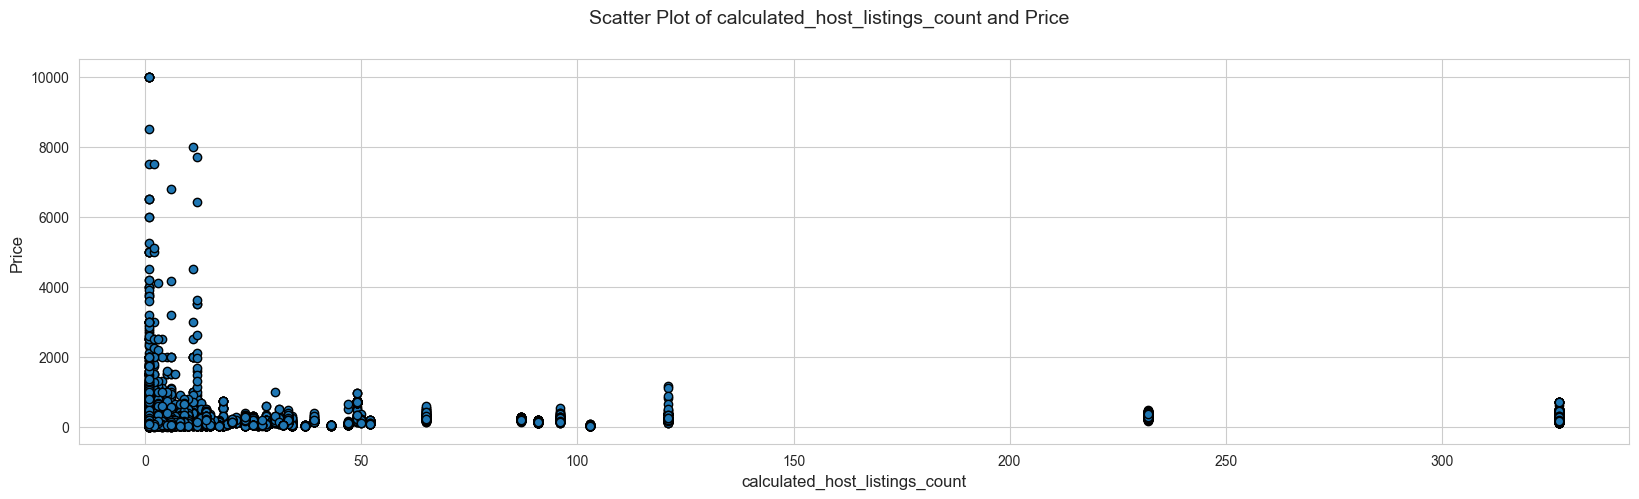

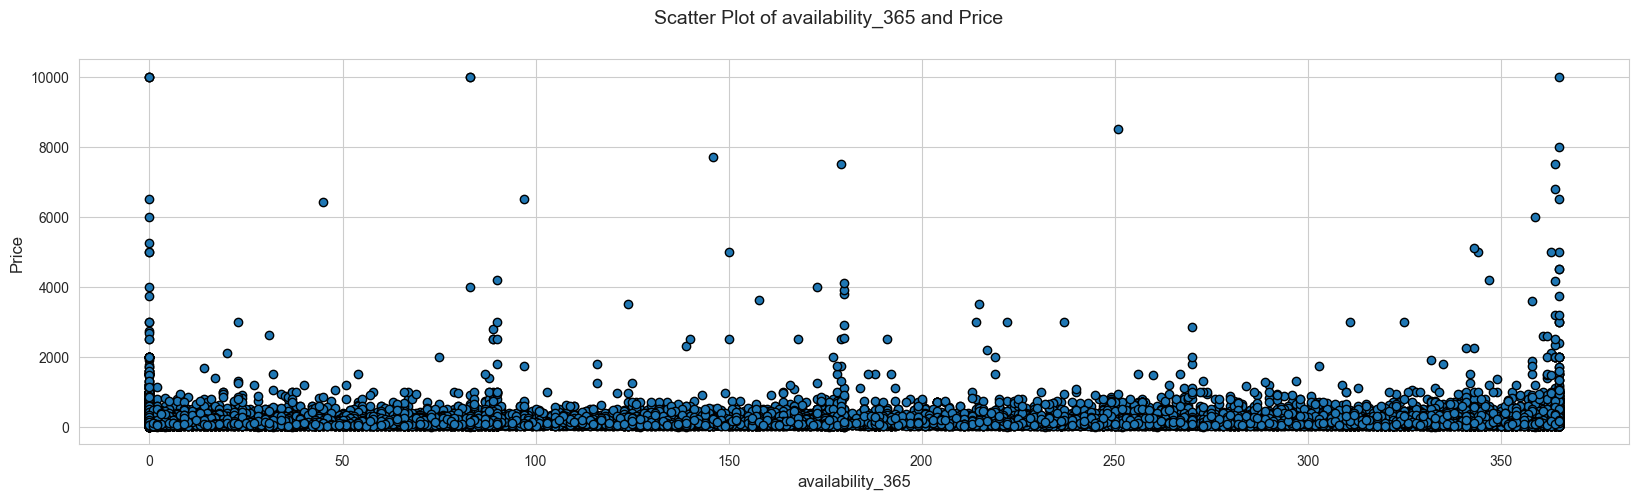

In [16]:
features = ['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
#features = ['neighbourhood_group','neighbourhood','room_type']
for feature in features:
    scatter_plot(data, feature)  

In [17]:
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import CountEncoder
from category_encoders import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV


In [18]:
# Функция оценки по R2, MAE, RSME по кросс-валидации
def evaluate_encoding2(data,model,scaler,enc,cols):
  print(model,scaler,enc,cols)
  data_enc = data.copy()
  if enc == 'OneHotEncoder':
    enc = OneHotEncoder()
    data_enc = data_enc.drop(cols, axis = 1).join(enc.fit_transform(data_enc[cols], axis = 0))
  else:
    if enc == 'OrdinalEncoder': enc = OrdinalEncoder()
    elif enc == 'CountEncoder': enc = CountEncoder()
    data_enc[cols]= enc.fit_transform(data_enc[cols])
  if scaler == 'RobustScaler': scaler = RobustScaler()
  elif scaler == 'StandardScaler': scaler = StandardScaler() 
  elif scaler == 'MinMaxScaler': scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data_enc.drop('price', axis = 1))
  if model == 'LinearRegression': model = LinearRegression()
  elif model == 'RidgeCV': model = RidgeCV()
  elif model == 'LassoCV': model = LassoCV()
  elif model == 'ElasticNetCV': model = ElasticNetCV()
  model_res_r2 = np.mean(cross_val_score(model, scaled_data, y = data_enc.price, cv = 5, scoring = 'r2'))
  model_res_mae = np.mean(cross_val_score(model, scaled_data, y = data_enc.price, cv = 5, scoring = 'neg_mean_absolute_error'))
  model_res_rmse = np.mean(cross_val_score(model, scaled_data, y = data_enc.price, cv = 5, scoring = 'neg_root_mean_squared_error'))
  return [round(model_res_r2,4), round(model_res_mae,4), round(model_res_rmse,4)]

Предсказание для данных без корректировки на выбросы и аномалии, для различных моделей, кодировок и стандартизации.

In [19]:
#Полный анализ по списку моделей, кодеровок и стандартизации
results = {}
cols = ['neighbourhood_group','neighbourhood','room_type']
scaler_list = ['StandardScaler','RobustScaler', 'MinMaxScaler']
enc_list = ['OrdinalEncoder', 'CountEncoder', 'OneHotEncoder']
model_list = ['LinearRegression', 'RidgeCV', 'LassoCV', 'ElasticNetCV']

for scaler in scaler_list:
    for enc in enc_list:
        for model in model_list:
            results[model + ' & ' + enc + ' & ' + scaler] = evaluate_encoding2(data, model, scaler,enc,cols)

LinearRegression StandardScaler OrdinalEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
RidgeCV StandardScaler OrdinalEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
LassoCV StandardScaler OrdinalEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
ElasticNetCV StandardScaler OrdinalEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
LinearRegression StandardScaler CountEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
RidgeCV StandardScaler CountEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
LassoCV StandardScaler CountEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
ElasticNetCV StandardScaler CountEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
LinearRegression StandardScaler OneHotEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
RidgeCV StandardScaler OneHotEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
LassoCV StandardScaler OneHotEncoder ['neighbourhood_

In [20]:
pd.DataFrame(results, index = ['R2', 'MAE', 'RMSE'])

,LinearRegression & OrdinalEncoder & StandardScaler,RidgeCV & OrdinalEncoder & StandardScaler,LassoCV & OrdinalEncoder & StandardScaler,ElasticNetCV & OrdinalEncoder & StandardScaler,LinearRegression & CountEncoder & StandardScaler,RidgeCV & CountEncoder & StandardScaler,LassoCV & CountEncoder & StandardScaler,ElasticNetCV & CountEncoder & StandardScaler,LinearRegression & OneHotEncoder & StandardScaler,RidgeCV & OneHotEncoder & StandardScaler,LassoCV & OneHotEncoder & StandardScaler,ElasticNetCV & OneHotEncoder & StandardScaler,LinearRegression & OrdinalEncoder & RobustScaler,RidgeCV & OrdinalEncoder & RobustScaler,LassoCV & OrdinalEncoder & RobustScaler,ElasticNetCV & OrdinalEncoder & RobustScaler,LinearRegression & CountEncoder & RobustScaler,RidgeCV & CountEncoder & RobustScaler,LassoCV & CountEncoder & RobustScaler,ElasticNetCV & CountEncoder & RobustScaler,LinearRegression & OneHotEncoder & RobustScaler,RidgeCV & OneHotEncoder & RobustScaler,LassoCV & OneHotEncoder & RobustScaler,ElasticNetCV & OneHotEncoder & RobustScaler,LinearRegression & OrdinalEncoder & MinMaxScaler,RidgeCV & OrdinalEncoder & MinMaxScaler,LassoCV & OrdinalEncoder & MinMaxScaler,ElasticNetCV & OrdinalEncoder & MinMaxScaler,LinearRegression & CountEncoder & MinMaxScaler,RidgeCV & CountEncoder & MinMaxScaler,LassoCV & CountEncoder & MinMaxScaler,ElasticNetCV & CountEncoder & MinMaxScaler,LinearRegression & OneHotEncoder & MinMaxScaler,RidgeCV & OneHotEncoder & MinMaxScaler,LassoCV & OneHotEncoder & MinMaxScaler,ElasticNetCV & OneHotEncoder & MinMaxScaler
R2,0.0872,0.0872,0.0871,0.0872,0.0560,0.0560,0.0560,0.0560,-1.276668e+25,0.1069,0.1078,0.1077,0.0872,0.0872,0.0870,0.0633,0.0560,0.0560,0.0558,0.0484,-1.752689e+11,0.1087,0.1035,0.0745,0.0872,0.0877,0.0874,0.0778,0.0560,0.0561,0.0562,0.0515,-8.123670e+17,0.1090,0.1084,0.0974
MAE,-75.5771,-75.5732,-74.7749,-74.7958,-84.0845,-84.0817,-83.5025,-83.5004,-8.916390e+12,-72.4649,-71.1571,-70.6519,-75.5771,-75.5703,-75.0169,-78.7629,-84.0845,-84.0820,-83.6893,-83.4800,-1.412425e+06,-72.1359,-72.3502,-76.2486,-75.5771,-75.3662,-74.7137,-75.0695,-84.0845,-84.0374,-83.4915,-83.0572,-2.025291e+09,-71.7385,-71.2134,-71.0787
RMSE,-227.8413,-227.8410,-227.8603,-227.8495,-231.6672,-231.6669,-231.6687,-231.6810,-6.141668e+14,-225.3973,-225.2893,-225.3065,-227.8413,-227.8411,-227.8756,-230.7790,-231.6672,-231.6671,-231.7050,-232.5781,-8.365414e+07,-225.1872,-225.8220,-229.4150,-227.8413,-227.7801,-227.8267,-229.0375,-231.6672,-231.6557,-231.6545,-232.2279,-1.168126e+11,-225.1404,-225.2226,-226.6027


Будем выполнять модификацию данных и оценивать влияние на качество предсказания с использованием RidgeCV & OneHotEncoder & MinMaxScaler, как имеющих на данный момент самое качественное предсказание. (R2 = 0.1090, MAE = -71.7385, RMSE = -225.1404)

In [21]:
data_replace = data.copy()

In [22]:
# Удаляем строки с нулевым значение цены
data_replace = data_replace.drop(index = data_replace[data_replace['price'] == 0].index)

In [23]:
#Быстрый анализ по одной модели
cols = ['neighbourhood_group','neighbourhood','room_type']
scaler = 'MinMaxScaler'
enc = 'OneHotEncoder'
model = 'RidgeCV'
evaluate_encoding2(data_replace, model, scaler,enc,cols)

RidgeCV MinMaxScaler OneHotEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']


[np.float64(0.109), np.float64(-71.7407), np.float64(-225.1599)]

Удаление строчек с нулевым значением никак не повлияло.

In [24]:
# Заменяем значение цены большей значения 95% ного квантеля на значение 95% ного квантеля для каждого 'neighbourhood'
for a in data_replace.neighbourhood.unique():
    quartile_95 = data_replace.price[data_replace['neighbourhood'] == a].quantile(0.95)
    data_replace.loc[((data_replace['price'] > quartile_95) & (data_replace['neighbourhood'] == a)), 'price'] = quartile_95


In [25]:
#Быстрый анализ по одной модели
cols = ['neighbourhood_group','neighbourhood','room_type']
scaler = 'MinMaxScaler'
enc = 'OneHotEncoder'
model = 'RidgeCV'
evaluate_encoding2(data_replace, model, scaler,enc,cols)

RidgeCV MinMaxScaler OneHotEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']


[np.float64(0.4361), np.float64(-48.652), np.float64(-75.8808)]

Замена выбросов вверх на значение 95%-ного квантеля значительно повлияло на качество предсказания.

In [26]:
# Заменяем значение цены меньшей значения 5% ного квантеля на значение 5% ного квантеля для каждого 'neighbourhood'
for a in data_replace.neighbourhood.unique():
    quartile_05 = data_replace.price[data_replace['neighbourhood'] == a].quantile(0.05)
    data_replace.loc[((data_replace['price'] < quartile_05) & (data_replace['neighbourhood'] == a)), 'price'] = quartile_05

In [27]:
#Быстрый анализ по одной модели
cols = ['neighbourhood_group','neighbourhood','room_type']
scaler = 'MinMaxScaler'
enc = 'OneHotEncoder'
model = 'RidgeCV'
evaluate_encoding2(data_replace, model, scaler,enc,cols)

RidgeCV MinMaxScaler OneHotEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']


[np.float64(0.4372), np.float64(-48.3412), np.float64(-75.5388)]

Замена выбросов вниз на значение 5% ного квантеля не значительно улучшило предсказание.

In [28]:
# Заменяем значение 'minimum_nights' на 365 если оно больше
data_replace.loc[(data_replace['minimum_nights'] > 365), 'minimum_nights'] = 365

In [29]:
#Быстрый анализ по одной модели
cols = ['neighbourhood_group','neighbourhood','room_type']
scaler = 'MinMaxScaler'
enc = 'OneHotEncoder'
model = 'RidgeCV'
evaluate_encoding2(data_replace, model, scaler,enc,cols)

RidgeCV MinMaxScaler OneHotEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']


[np.float64(0.4381), np.float64(-48.147), np.float64(-75.4721)]

Замена значения 'minimum_nights' на 365 если оно больше практически не повлияло на качество предсказания.

In [30]:
# Заменяем значение reviews_per_month на 20 если оно больше
data_replace.loc[(data_replace['reviews_per_month'] > 20), 'reviews_per_month'] = 20

In [31]:
#Быстрый анализ по одной модели
cols = ['neighbourhood_group','neighbourhood','room_type']
scaler = 'MinMaxScaler'
enc = 'OneHotEncoder'
model = 'RidgeCV'
evaluate_encoding2(data_replace, model, scaler,enc,cols)

RidgeCV MinMaxScaler OneHotEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']


[np.float64(0.438), np.float64(-48.2008), np.float64(-75.4795)]

Замена значений reviews_per_month на 20 если оно больше практичеки не повлияло на качество предсказания.

In [32]:
# Заменяем значение number_of_reviews на 500 если оно больше
data_replace.loc[(data_replace['number_of_reviews'] > 500), 'number_of_reviews'] = 500

In [33]:
#Быстрый анализ по одной модели
cols = ['neighbourhood_group','neighbourhood','room_type']
scaler = 'MinMaxScaler'
enc = 'OneHotEncoder'
model = 'RidgeCV'
evaluate_encoding2(data_replace, model, scaler,enc,cols)

RidgeCV MinMaxScaler OneHotEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']


[np.float64(0.4379), np.float64(-48.2183), np.float64(-75.4859)]

Заменяем значение number_of_reviews на 500 если оно больше практичеки не повлияло на качество предсказания.

Вывод: значительное улучшение дало только удаление выбросов по цене, удаление выбросов по другим парамметрам практически не повлияло на предсказанеие.

In [34]:
data_replace.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,40.728953,-73.952176,137.505194,6.942885,23.259799,1.372178,7.144628,112.779498
std,0.054532,0.046159,101.466801,17.531526,44.407853,1.474913,32.956185,131.627271
min,40.499790,-74.244420,20.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983080,70.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,40.723080,-73.955685,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,1650.000000,365.000000,500.000000,20.000000,327.000000,365.000000


In [35]:
#Полный анализ по списку моделей, кодеровок и стандартизации
results = {}
cols = ['neighbourhood_group','neighbourhood','room_type']
scaler_list = ['StandardScaler','RobustScaler', 'MinMaxScaler']
enc_list = ['OrdinalEncoder', 'CountEncoder', 'OneHotEncoder']
model_list = ['LinearRegression', 'RidgeCV', 'LassoCV', 'ElasticNetCV']

for scaler in scaler_list:
    for enc in enc_list:
        for model in model_list:
            results[model + ' & ' + enc + ' & ' + scaler] = evaluate_encoding2(data_replace, model, scaler,enc,cols)

LinearRegression StandardScaler OrdinalEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
RidgeCV StandardScaler OrdinalEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
LassoCV StandardScaler OrdinalEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
ElasticNetCV StandardScaler OrdinalEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
LinearRegression StandardScaler CountEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
RidgeCV StandardScaler CountEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
LassoCV StandardScaler CountEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
ElasticNetCV StandardScaler CountEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
LinearRegression StandardScaler OneHotEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
RidgeCV StandardScaler OneHotEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']
LassoCV StandardScaler OneHotEncoder ['neighbourhood_

In [36]:
pd.DataFrame(results, index = ['R2', 'MAE', 'RMSE'])

,LinearRegression & OrdinalEncoder & StandardScaler,RidgeCV & OrdinalEncoder & StandardScaler,LassoCV & OrdinalEncoder & StandardScaler,ElasticNetCV & OrdinalEncoder & StandardScaler,LinearRegression & CountEncoder & StandardScaler,RidgeCV & CountEncoder & StandardScaler,LassoCV & CountEncoder & StandardScaler,ElasticNetCV & CountEncoder & StandardScaler,LinearRegression & OneHotEncoder & StandardScaler,RidgeCV & OneHotEncoder & StandardScaler,LassoCV & OneHotEncoder & StandardScaler,ElasticNetCV & OneHotEncoder & StandardScaler,LinearRegression & OrdinalEncoder & RobustScaler,RidgeCV & OrdinalEncoder & RobustScaler,LassoCV & OrdinalEncoder & RobustScaler,ElasticNetCV & OrdinalEncoder & RobustScaler,LinearRegression & CountEncoder & RobustScaler,RidgeCV & CountEncoder & RobustScaler,LassoCV & CountEncoder & RobustScaler,ElasticNetCV & CountEncoder & RobustScaler,LinearRegression & OneHotEncoder & RobustScaler,RidgeCV & OneHotEncoder & RobustScaler,LassoCV & OneHotEncoder & RobustScaler,ElasticNetCV & OneHotEncoder & RobustScaler,LinearRegression & OrdinalEncoder & MinMaxScaler,RidgeCV & OrdinalEncoder & MinMaxScaler,LassoCV & OrdinalEncoder & MinMaxScaler,ElasticNetCV & OrdinalEncoder & MinMaxScaler,LinearRegression & CountEncoder & MinMaxScaler,RidgeCV & CountEncoder & MinMaxScaler,LassoCV & CountEncoder & MinMaxScaler,ElasticNetCV & CountEncoder & MinMaxScaler,LinearRegression & OneHotEncoder & MinMaxScaler,RidgeCV & OneHotEncoder & MinMaxScaler,LassoCV & OneHotEncoder & MinMaxScaler,ElasticNetCV & OneHotEncoder & MinMaxScaler
R2,0.3278,0.3278,0.3284,0.3288,0.2032,0.2032,0.2036,0.2042,-8.234480e+25,0.4365,0.4356,0.4365,0.3278,0.3278,0.3280,0.2282,0.2032,0.2032,0.2028,0.1767,-9.757822e+12,0.4399,0.3957,0.2753,0.3278,0.3279,0.3286,0.2986,0.2032,0.2033,0.2037,0.1922,-1.986900e+18,0.4379,0.4363,0.3901
MAE,-52.8590,-52.8575,-52.6939,-52.6422,-62.0164,-62.0152,-62.0630,-61.8977,-1.052804e+13,-48.3937,-48.1172,-48.0588,-52.8590,-52.8574,-52.7123,-58.7450,-62.0164,-62.0159,-61.9487,-62.5814,-3.690050e+06,-48.2246,-49.6674,-56.0299,-52.8590,-52.8425,-52.6848,-53.7818,-62.0164,-62.0035,-62.0529,-61.8719,-1.599563e+09,-48.2183,-48.1687,-49.3123
RMSE,-82.6185,-82.6179,-82.5801,-82.5682,-89.9785,-89.9777,-89.9559,-89.9192,-6.481701e+14,-75.5757,-75.6566,-75.6099,-82.6185,-82.6185,-82.6155,-88.5275,-89.9785,-89.9785,-90.0108,-91.4627,-2.139446e+08,-75.3593,-78.2098,-85.7771,-82.6185,-82.6108,-82.5655,-84.4354,-89.9785,-89.9691,-89.9485,-90.5789,-9.163062e+10,-75.4859,-75.6026,-78.6652


По итогам лучшее показатели показала связка RidgeCV & OneHotEncoder & RobustScaler (R2 = 0.4399, MAE = -48.2246, RMSE = -75.3593)

Добавить дополнительный столбец Евклидово расстояние до Эмпайр-стейт-билдинг в центре Манхеттена (40.74848 -73.98567)

In [37]:
data_new = data_replace.copy()
data_new['distance_to_ESB']= np.sqrt((data_new['latitude'] - 40.74848)**2 + (data_new['longitude'] - (-73.98567))**2)
data_new.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_to_ESB
count,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,40.728953,-73.952176,137.505194,6.942885,23.259799,1.372178,7.144628,112.779498,0.067559
std,0.054532,0.046159,101.466801,17.531526,44.407853,1.474913,32.956185,131.627271,0.045202
min,40.499790,-74.244420,20.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000257
25%,40.690100,-73.983080,70.000000,1.000000,1.000000,0.280000,1.000000,0.000000,0.033438
50%,40.723080,-73.955685,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000,0.063512
75%,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,0.087053
max,40.913060,-73.712990,1650.000000,365.000000,500.000000,20.000000,327.000000,365.000000,0.356312


In [38]:
#Быстрый анализ по одной модели
cols = ['neighbourhood_group','neighbourhood','room_type']
scaler = 'RobustScaler'
enc = 'OneHotEncoder'
model = 'RidgeCV'
evaluate_encoding2(data_new, model, scaler,enc,cols)

RidgeCV RobustScaler OneHotEncoder ['neighbourhood_group', 'neighbourhood', 'room_type']


[np.float64(0.438), np.float64(-48.217), np.float64(-75.4754)]

В данном случае добавление дополнительного признака практически не повлияло на результат

Предссказание на основе train и test выборки для сочетания RidgeCV & OneHotEncoder & RobustScaler

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
data_enc = data_replace.copy()
cols = ['neighbourhood_group','neighbourhood','room_type']
enc = OneHotEncoder()
data_enc = data_enc.drop(cols, axis = 1).join(enc.fit_transform(data_enc[cols], axis = 0))
y = data_enc['price']
x = data_enc.drop(['price'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((34218, 236), (14666, 236), (34218,), (14666,))

In [41]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
#model = LGBMRegressor().fit(x_train,y_train)
model = RidgeCV().fit(x_train,y_train)
y_pred = model.predict(x_test)
R2 = r2_score (y_test, y_pred)
MAE = mean_absolute_error (y_test, y_pred)
#RMSE = root_mean_squared_error (y_test, y_pred)
print (R2,MAE)

0.45011541262809607 47.39758259801946


Предсказание на основе ансамблирования моделей (RandomForestRegressor, LGBMRegressor).

In [43]:
!pip install lightgbm


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
from lightgbm import LGBMRegressor 
from sklearn.ensemble import RandomForestRegressor

In [45]:
data_enc = data_replace.copy()
cols = ['neighbourhood_group','neighbourhood','room_type']
enc = OneHotEncoder()
data_enc = data_enc.drop(cols, axis = 1).join(enc.fit_transform(data_enc[cols], axis = 0))
y = data_enc['price']
x = data_enc.drop(['price'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((34218, 236), (14666, 236), (34218,), (14666,))

In [46]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [47]:
#model = LGBMRegressor().fit(x_train,y_train)
model = RandomForestRegressor().fit(x_train,y_train)
y_pred = model.predict(x_test)
R2 = r2_score (y_test, y_pred)
MAE = mean_absolute_error (y_test, y_pred)
#RMSE = root_mean_squared_error (y_test, y_pred)
print (R2,MAE)

0.5373724165030622 41.95234305082049


In [48]:
model = LGBMRegressor().fit(x_train,y_train)
#model = RandomForestRegressor().fit(x_train,y_train)
y_pred = model.predict(x_test)
R2 = r2_score (y_test, y_pred)
MAE = mean_absolute_error (y_test, y_pred)
#RMSE = root_mean_squared_error (y_test, y_pred)
print (R2,MAE)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1614
[LightGBM] [Info] Number of data points in the train set: 34218, number of used features: 133
[LightGBM] [Info] Start training from score 137.870774
0.5418485094379725 42.17682895000299


Предсказание с использованием расстояния до Эмпайр-стейт-билдинг

In [49]:
data_enc = data_new.copy()
cols = ['neighbourhood_group','neighbourhood','room_type']
enc = OneHotEncoder()
data_enc = data_enc.drop(cols, axis = 1).join(enc.fit_transform(data_enc[cols], axis = 0))
y = data_enc['price']
x = data_enc.drop(['price'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((34218, 237), (14666, 237), (34218,), (14666,))

In [50]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
#model = LGBMRegressor().fit(x_train,y_train)
model = RandomForestRegressor().fit(x_train,y_train)
y_pred = model.predict(x_test)
R2 = r2_score (y_test, y_pred)
MAE = mean_absolute_error (y_test, y_pred)
#RMSE = root_mean_squared_error (y_test, y_pred)
print (R2,MAE)

0.5414939264849367 42.03456092208736


In [52]:
model = LGBMRegressor().fit(x_train,y_train)
#model = RandomForestRegressor().fit(x_train,y_train)
y_pred = model.predict(x_test)
R2 = r2_score (y_test, y_pred)
MAE = mean_absolute_error (y_test, y_pred)
#RMSE = root_mean_squared_error (y_test, y_pred)
print (R2,MAE)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1869
[LightGBM] [Info] Number of data points in the train set: 34218, number of used features: 134
[LightGBM] [Info] Start training from score 137.870774
0.5450303123908524 42.16056702589496


Выводы: 
- Кодировка категориальных признаков с помощью OneHotEncoder показало значительное увеличение качества предсказания по сравнению с другими способами кодировки.
- Модели с ассамблированием показывают лучшие результаты предсказания
- Для моделей с ассамблированием, ввод дополнительных парамметров улучшает качество предсказания (если ввести больше дополнительных парраметров, можно значительно улучшить качество предсказания)
